# Pandas入门 

pandas是数据分析时主要的工具，经常结合numpy,scipy及matplotlib一起使用。pandas支持大部分numpy数组风格的计算，尤其是使用数组函数而非大量的for循环。
***
尽管pandas采用很多numpy的代码风格，但最大的不同在于pandas是用来处理表格型或*异质型*数据的。
***
导入方式： import pandas as pd
***

## Pandas数据结构介绍

pandas中最重要的三种基础数据结构:index, Series, DataFrame。下面主要说Series，DataFrame。尽管不能解决所有的问题，但是他们为大多数应用提供了有效、易用的基础。

### Series

Series是一种一维的数组型对象，包含值序列和*索引*(index)，最简单的序列可以由一个数组组成。

In [1]:
import numpy as np
import pandas as pd

In [3]:
obj = pd.Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

交互式环境中，索引在左边，值在右边。由于没有指定索引，自动生成0到N-1（N为数组长度）。可以通过values和index来捕获Series的值和索引：

In [4]:
obj.values

array([ 4,  7, -5,  3], dtype=int64)

In [5]:
obj.index

RangeIndex(start=0, stop=4, step=1)

> 通常需要创建一个索引序列来作为数据的标签：

In [6]:
obj2 = pd.Series([4, 7, -5, 3], index=list('dbac')) # 注意index使用list类型传递
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [7]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

> 相比数组类型，可以在原先的默认索引和标签索引来进行索引：

In [8]:
obj2[1]

7

In [9]:
obj2['b']

7

In [10]:
obj2[['c', 'd']]

c    3
d    4
dtype: int64

In [12]:
obj2['d':'a']

d    4
b    7
a   -5
dtype: int64

> 使用numpy的风格，使用布尔数组过滤数据，标量计算或者应用数学函数：

In [13]:
obj2[obj2>0]

d    4
b    7
c    3
dtype: int64

In [14]:
obj2 * 2

d     8
b    14
a   -10
c     6
dtype: int64

In [15]:
np.exp(obj2)

d      54.598150
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

从另一个角度看Series,可以认为它是一个长度固定且有序的字典，因为它将索引值和数据按位置配对。我们看：

In [17]:
'a' in obj2  # 像极了 key in dict

True

> 我们很自然可以使用字典（json）数据创建Series:

In [18]:
sdata = {'Ohio':35000, 'Texas':71000, 'Oregon':16000, 'Utah':5000}
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

> 指定字典数据的索引顺序：

In [19]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

指定索引中未包含的值（California）用NaN填充，不包含在索引中的（Utah）被排除在Series外。

<font color='red'>使用缺失和NA表示缺失值，pandas中使用isnull和notnull函数来检查缺失数据。</font>

In [20]:
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [21]:
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [22]:
obj4.notnull()

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

> <font color='red'>Series自动对齐特性(依据index):</font>

In [23]:
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [24]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [25]:
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

> Series对象本身和其索引都有name属性：

In [26]:
obj4.name = 'population'
obj4.index.name = 'states'
obj4

states
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

> 修改Series的索引：

In [27]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [28]:
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

### DataFrame

DataFrame表示的是矩阵的数据表，包含已排序的列集合，每一列可以是不同的值类型（数值，字符串，布尔值等）。DataFrame既有行索引也有列索引。可以被视为一个共享相同索引（行索引）的Series的字典。<br>
尽管DataFrame是二维的，但是可以利用分层索引在DataFrame中展示更高维度的数据。

---
有很多方式可以构建DataFrame，其中最常见的方式是利用包含长度列表或numpy数组的字典来实现：

In [2]:
data = {'state':['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year':[2000, 2001, 2002, 2001, 2002, 2003],
        'pop':[1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [3]:
frame.head()  # 对于大数据集可以用来只展示前5行

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


> 指定特定的列顺序排列：

In [4]:
pd.DataFrame(data, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


> 如果传递的值不在字典中，会用NaN填充：

In [5]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                      index=['one', 'two', 'three', 'four', 'five', 'six'])
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [6]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

> 检索列数据：

In [7]:
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [8]:
frame2.year  #由于中文数据，个人用的比较少

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

返回的Series与原DataFrame有相同的索引，且Series的name属性也会被合理设置。

> 争对特殊属性用loc进行选取：

In [9]:
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

> 列的引用可以用来修改数据：

In [15]:
frame2['debt'] = 16.5
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


In [16]:
frame2['debt'] = np.arange(6.)
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


> 通过Series来赋值一列数据：

Series的索引会按照DataFrame的索引重新排列，并且在空缺的地方填充缺失值。

In [17]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
frame2['debt'] = val
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


<font color='red'>如果被赋值的列不存在，则会生成一个新的列。del关键字也能删除DataFrame的列。</font>

In [18]:
frame2['eastern'] = frame2['state'] == 'Ohio'
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


frame2.eastern不能创建新列。所以个人推荐frame2\['eastern'\]。

In [19]:
del frame2['eastern']
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

<font color='red'>DataFrame中选取的列是数据的*视图*，而不是拷贝。因此，对Series的修改会隐射到DataFrame中。如果需要复制，应当使用Series的copy方法。</font>

> 通过嵌套字典来创建DataFrame:

In [10]:
pop = {'Nevada':{2001: 2.4, 2002: 2.9},
       'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}
frame3 = pd.DataFrame(pop)
frame3

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


> 内部字典的键被联合，如果已经显示指明索引的话，内部字典的键将不会被排序：

In [30]:
pd.DataFrame(pop, index=pd.Index([2001, 2002, 2003]))
# pd.DataFrame(pop, index=[2001, 2002, 2003])令人困惑的失败了---

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


> 包含Series的字典也可以创建DataFrame:

In [32]:
pdata = {'Ohio': frame3['Ohio'][:-1],
         'Nevada': frame3['Nevada'][:2]}
pd.DataFrame(pdata)

,Ohio,Nevada
2000,1.5,NaN
2001,1.7,2.4


> 转置DataFrame:

In [41]:
frame3.T

,2000,2001,2002
Nevada,NaN,2.4,2.9
Ohio,1.5,1.7,3.6


> 为Frame添加name属性：

In [11]:
frame3.index.name = 'year'
frame3.columns.name = 'state'
frame3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


> DataFrame的values会以二维的ndarray形式返回：

In [43]:
frame3.values

array([[nan, 1.5],
       [2.4, 1.7],
       [2.9, 3.6]])

如果DataFrame有不同数据类型的列（大多数情况），values会自动选择适合所有列的类型（一般是object）：

In [44]:
frame2.values

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, -1.2],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, -1.5],
       [2002, 'Nevada', 2.9, -1.7],
       [2003, 'Nevada', 3.2, nan]], dtype=object)

+ 构造DataFrame的有效输入：

类型 | 注释
- | -
2D ndarray | 数据的矩阵，行和列的标签是可选参数
数组，列表和元组构成的字典 | 每个序列为DataFrame的一列，所有序列必须长度相等
numpy结构化/记录化的数组 | 与数组构成字典一致
Series构成的字典 | 每个值为一列，每个Series的索引联合组成行索引，也可以显示传递索引
字典构成的字典 | 每个内部字典成一列，内部字典的键联合成行索引
字典或Series构成的列表 | 列表中的一个元素形成DataFrame的一行，字典键或Series的索引联合形成DataFrame的列标签
列表或元组构成的列表 | 与2D ndarray一致
其他DataFrame | 如果不显示传递索引，则会使用原DataFrame的索引
numpy MaskedArray | 与2D ndarray的情况类似，但隐蔽值会在DataFrame中成为NA/缺失值

In [47]:
data = np.random.randn(3, 4)
data

array([[-0.72464584, -1.23894813,  0.33468619,  0.97633599],
       [-1.5455614 , -0.71447204, -0.57767409,  0.08786041],
       [ 1.86983296, -2.29198061,  0.98661309,  1.19946911]])

In [49]:
pd.DataFrame(np.where(data>0, data, np.nan))  # 实现maskedArray--个人想法

,0,1,2,3
0,NaN,NaN,0.334686,0.976336
1,NaN,NaN,NaN,0.087860
2,1.869833,NaN,0.986613,1.199469


### 索引对象

pandas中的索引对象是用于存储轴标签和其他元数据的（例如轴名称）。构造Series或DataFrame时，所使用的任意数组或标签序列都可以在内部转换成索引对象：

In [2]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])
index = obj.index
index

Index(['a', 'b', 'c'], dtype='object')

In [3]:
index[1:]

Index(['b', 'c'], dtype='object')

> index是不可修改的：

In [4]:
index[1] = 'd'  # TypeError

TypeError: Index does not support mutable operations

不变性利于多种数据共享索引对象。

In [5]:
labels = pd.Index(range(3))
labels

RangeIndex(start=0, stop=3, step=1)

In [7]:
obj2 = pd.Series([1.5, -2.5, 0], index=labels)
obj2

0    1.5
1   -2.5
2    0.0
dtype: float64

In [9]:
obj2.index is labels

True

除了类似数组，索引对象也是一个固定大小的集合：

In [12]:
frame3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [13]:
frame3.columns

Index(['Nevada', 'Ohio'], dtype='object', name='state')

In [14]:
'Ohio' in frame3.columns

True

> 与python集合不同，pandas索引对象可以包含重复标签：

In [15]:
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar'])
dup_labels

Index(['foo', 'foo', 'bar', 'bar'], dtype='object')

+ 一些索引对象的方法和属性：

方法 | 描述
- | -
append | 将额外的索引对象粘贴到原索引后，*产生一个新的索引*
difference | 计算两个索引的差集
intersection | 计算两个索引的交集
union | 计算两个索引的并集
isin | 计算表示每一个值是否在传值容器中的布尔数组
delete | 将位置i的元素删除，*产生一个新的索引*
drop | 根据传参删除指定索引值，*产生一个新的索引*
insert | 在i位置插入元素，*产生一个新的索引*
is_monotonic | 如果索引序列递增返回True
is_unique | 如果索引序列唯一则返回True
unique | 计算索引的唯一值序列
duplicated | 放回是否重复的布尔数组

## 基本功能

了解Series，DataFrame基本交互机制，深入部分后面再说。详情可以参考官方文档。

### 重建索引（索引重置顺序不修改对应关系）

reindex是pandas对象的重要方法，该方法用于创建一个符合新索引的对象：

In [24]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=list('dbac'))
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

> reindex方法会将数据按照新索引重新排列，不存在的索引值会引入NA：

In [25]:
obj2 = obj.reindex(list('abcde'))
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

<font color='red'>对于顺序数据，尤其是时间数据，重建索引时会需要进行插值或填值，可通过method参数来指定。例如ffill,会根据向前填充。</font>

In [26]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3

0      blue
2    purple
4    yellow
dtype: object

In [27]:
obj3.reindex(range(6), method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

DataFrame中，reindx可以修改行索引，列索引，也可以同时修改两者。传递一个列参数时默认重置行索引：

In [28]:
frame = pd.DataFrame(np.arange(9).reshape(3, 3), 
                     index=list('acd'), columns=['Ohio', 'Texas', 'California'])
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [29]:
frame2 = frame.reindex(list('abcd'))
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [30]:
states = ['Texas', 'Utah', 'California']
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


> 很多时候我们更倾向于使用loc来实现：

In [34]:
frame.loc[list('abcd'), states] # 看来将来就不能用了

c:\users\sandwich\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


,Texas,Utah,California
a,1.0,NaN,2.0
b,NaN,NaN,NaN
c,4.0,NaN,5.0
d,7.0,NaN,8.0


+ reindex方法参数：

参数 | 描述
- | -
index | 新建作为索引的序列，可以是索引实例或任意其他序列类型Python数据结构，索引使用时无需复制可使用变量传递
method | 插值方式，ffill向前填充，bfill向后填充
fill_value | 通过重新索引引入缺失数据时使用的代替值
limit | 当向前或向后填充时，所需填充的最大尺寸间隙（元素个数）
tolerance | 向前或向后填充时，所需填充的不确定匹配下的最大尺寸间隙（以绝对数字距离）
level | 匹配MultiIndex级别的简单索引，否在选择子集
copy | 如果为True，即使新索引等于旧索引，也总是复制底层数据，如果为False则索引相同也不要复制数据

In [35]:
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [53]:
view = frame.reindex(list('adc'), copy=False)
view.loc['a', 'Ohio'] = 99
view

,Ohio,Texas,California
a,99,1,2
d,6,7,8
c,3,4,5


In [54]:
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


<font color='orange'>感觉copy=False的时候也是拷贝数据，没有提供原数据的视图，官方说明也不清楚，不影响使用总感觉copy参数比较多余。</font>

### 轴向上删除条目

In [55]:
obj = pd.Series(np.arange(5.), index=list('abcde'))
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [56]:
new_obj = obj.drop('c')
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [57]:
obj.drop(['d', 'c'])

a    0.0
b    1.0
e    4.0
dtype: float64

> DataFrame中可以行列轴向上删除：

In [58]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utha', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utha,8,9,10,11
New York,12,13,14,15


In [59]:
data.drop(['Colorado', 'Ohio'])

,one,two,three,four
Utha,8,9,10,11
New York,12,13,14,15


In [60]:
data.drop('one', axis=1) # 也可以通过axis='columns'来实现

,two,three,four
Ohio,1,2,3
Colorado,5,6,7
Utha,9,10,11
New York,13,14,15


<font color='red'>很多函数，例如drop会修改DataFrame的尺寸或形状，这些操作一般不会修改原数据，但是我们有的时候希望操作原数据而不是重新赋值时可以使用inplace参数来指定。</font>

In [61]:
data.drop('Utha', inplace=True) # 原数组改变不返回结果

In [62]:
data #原数据被修改了

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,12,13,14,15


### 索引、选择与过滤

与之前numpy中索引和切片类似，需要结合布尔数组（Series）位操作等待，统一适用的原则较少，需要自己慢慢修行。

In [63]:
obj = pd.Series(np.arange(4.), index=list('abcd'))
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [64]:
obj['c'] #单个是值

2.0

In [65]:
obj[2:4] #多个是Series[切片]

c    2.0
d    3.0
dtype: float64

In [66]:
obj[[1, 3]]

b    1.0
d    3.0
dtype: float64

In [67]:
obj[['b', 'a', 'd']]

b    1.0
a    0.0
d    3.0
dtype: float64

In [68]:
obj['b':'c'] #区别数值切片，右边也取，个人比较喜欢这样切片不要数数

b    1.0
c    2.0
dtype: float64

In [69]:
obj[obj<2] #布尔索引-obj<2生成布尔Series

a    0.0
b    1.0
dtype: float64

In [70]:
obj['b':'c'] = 5 # 索引切片修改，原生修改
obj

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

> DataFrame的索引相对也复杂些：

In [2]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utha', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utha,8,9,10,11
New York,12,13,14,15


In [72]:
data['two'] # 等价data.two(少用),属性作用在列上

Ohio         1
Colorado     5
Utha         9
New York    13
Name: two, dtype: int32

In [73]:
data[['three', 'one']]

,three,one
Ohio,2,0
Colorado,6,4
Utha,10,8
New York,14,12


In [74]:
data[:2] # []另一种，数值和布尔体现在行上，尤其是布尔很实用。后续将

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [75]:
data[data['three']>5]  #布尔很实用，加上位逻辑操作可以说是神技

,one,two,three,four
Colorado,4,5,6,7
Utha,8,9,10,11
New York,12,13,14,15


> 拆解下布尔的机理：

In [76]:
data['three']>5 #返回了一个布尔Series，带Index的。这里可以利用index的对应特性来实现筛选数据

Ohio        False
Colorado     True
Utha         True
New York     True
Name: three, dtype: bool

In [77]:
logic = data['three']>5
data[logic]

,one,two,three,four
Colorado,4,5,6,7
Utha,8,9,10,11
New York,12,13,14,15


> 布尔的另一个常用机制：

In [80]:
data < 5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utha,False,False,False,False
New York,False,False,False,False


In [82]:
data[data<5] = 0
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utha,8,9,10,11
New York,12,13,14,15


这个例子和numpy二维数组异曲同工， <font color='blue'>阈值处理十分常用！</font>

In [83]:
arr = np.random.randn(4, 4)
arr

array([[-0.4242416 , -0.28119606,  0.18744757, -0.26214791],
       [-0.28362239, -0.82234463, -2.21274359,  0.77390936],
       [-3.23527271, -0.35721109, -0.40062906,  0.95512268],
       [ 0.2237259 , -0.35128217,  0.98827603, -1.01600844]])

In [84]:
arr[arr<0] = 0
arr

array([[0.        , 0.        , 0.18744757, 0.        ],
       [0.        , 0.        , 0.        , 0.77390936],
       [0.        , 0.        , 0.        , 0.95512268],
       [0.2237259 , 0.        , 0.98827603, 0.        ]])

#### 使用loc和iloc选择数据

针对DataFrame在行上的标签索引，使用loc符号和iloc符号。loc(显示定义的标签)，iloc(默认自动生成的数值标签，绝对位置),但是维度上都满足【axis0, axis1】

In [85]:
data.loc['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int32

In [86]:
data.iloc[2, [3, 0, 1]]

four    11
one      8
two      9
Name: Utha, dtype: int32

In [87]:
data.iloc[2]

one       8
two       9
three    10
four     11
Name: Utha, dtype: int32

In [89]:
data.iloc[[1, 2], [3, 0, 1]] 

,four,one,two
Colorado,7,0,5
Utha,11,8,9


> DataFrame切片：

In [90]:
data.loc[:'Utha', 'two']

Ohio        0
Colorado    5
Utha        9
Name: two, dtype: int32

In [91]:
data.iloc[:, :3][data.three>5]  # 可以说比较花哨了，可以分步骤实现

,one,two,three
Colorado,0,5,6
Utha,8,9,10
New York,12,13,14


+ DataFrame索引选项：

类型 | 描述
- | -
df\[val\] | 从DataFrame中选择单列或列序列；特殊情况的便利：布尔数组过滤行，对行切片或布尔逻辑处理<br>数值数组作用列；切片、布尔作用行
df.loc\[val\] | 根据标签选择单行还是多行
df.loc\[val1, val2\] | 根据标签同时选择行和列中的一部分
df.iloc\[where\] | 根据整数位置选择单行或者多行
df.iloc\[:, where\] | 根据整数位置选择单列或者多列
df.iloc\[where_i, where_j\] | 根据位置选择行和列
df.at\[label_i, label_j\] | 根据行、列标签选择单个标量值
df.iat\[i, j\] | 根据行、列整数位置选择单个标量值
reindex方法 | 通过标签选择行或列
get_value, set_value方法 | 根据行和列的标签获取和设置单个值

### 整数索引

在pandas上使用整数索引会带来歧义，与python内建索引的方式存在不同：

In [3]:
ser = pd.Series(np.arange(3.))
ser[-1]  # 这样会把-1当作索引值，但是索引中没有-1

KeyError: -1

In [4]:
ser.iloc[-1]  # 只能在这儿告诉索引用的是位置不是索引值。

2.0

<font color='orange'>这部分是个人的理解！</font>

如果显示定义了index就不会存在这样的困扰：

In [6]:
ser = pd.Series(np.arange(3.), index=list('abc'))
ser

a    0.0
b    1.0
c    2.0
dtype: float64

In [7]:
ser[-1] # 这里索引是非整数形式，自动转化成位置索引。

2.0

在不指定loc或iloc时，内建机制会自动判断。我们不妨测试自定义整数索引虽然大多数人不会这么无聊。

In [8]:
ser = pd.Series(np.arange(3.), index=list(range(1, 4)))
ser

1    0.0
2    1.0
3    2.0
dtype: float64

In [9]:
ser[-1] # 按照理解索引定义是整数，会找-1索引值会报错

KeyError: -1

<font color='red'>所以开发者建议使用整数索引是保持使用loc,如果显示索引也是整数时可以使用iloc，个人建议统一使用iloc</font>

In [10]:
ser.iloc[:2]

1    0.0
2    1.0
dtype: float64

### 算术和数据对齐

不同索引的对象之间的算术行为为pandas提供了应用的重要特性。当对象相加时，如果存在某个索引对不相同，则返回两个对象的并集。<font color='red'>索引标签的自动外连接（outer join）</font>

In [2]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=list('acde'))
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index=list('acefg'))
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [3]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [4]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

完成步骤：
1. 按照索引的并集补全数据
  + s1=\[7.3, -2.5, 3.4, 1.5, NaN, NaN\], s2=\[-2.1, 3.6, NaN, -1.5, 4, 3.1\]
2. 补全后数据相加
3. NaN任何数学操作都是NaN

In [6]:
pd.Series.add(s1, s2, fill_value=0) # 我知道你们怎么想的，设计师也知道

a    5.2
c    1.1
d    3.4
e    0.0
f    4.0
g    3.1
dtype: float64

在DataFrame中，行和列都会执行对齐：

In [12]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                   index=['Ohio', 'Texas', 'Colorado'])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [13]:
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [14]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


行列索引都是并集作用的结果，c e两个不是共有列所有全为NaN，所以两个行列完全不同的DataFrame得到全空。<br>
<font color='orange'>个人理解的设计哲学，一个序列（数组，传递参数等），位置和名称知其一即可。位置必须按顺序来，有了名称顺序就不必要了。</font><br>
这里的索引是按名称对应的，所以顺序无关紧要。

#### 使用填充值得算术方法

类似上面Series的实现方法，DataFrame中也存在，索引不完全匹配希望0填充的情况：

In [16]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)), columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)), columns=list('abcde'))
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [17]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [18]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,11.0,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


> fill_value:

In [19]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,11.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


> 不仅这里可以使用填充值，reindex等也适用：

In [20]:
df1.reindex(columns=df2.columns, fill_value=0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


+ 灵活算术方法：

方法 | 描述
- | -
add, radd | 加法(+)
sub, rsub | 减法(-)
div, rdiv | 除法(/)
floordiv, rfloordiv | 整除(//)
mul, rmul | 乘法(\*)
pow, rpow | 幂次方(^/\*\*)

<font color='blue'>r开头的含义是参数的翻转：<br>
+ 1 / df1 等价于 df1.rdiv(1)</font>

#### DataFrame和Series之间的操作

DataFrame和Series的操作类似numpy不同维度数组间的操作（广播）,示例如下：

In [23]:
arr = np.arange(12.).reshape((3, 4))
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [24]:
arr[0]

array([0., 1., 2., 3.])

In [25]:
arr - arr[0] # 广播作用到每一行上

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

DataFrame中类似的实现：

In [26]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)), 
                     columns=list('bde'), 
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [27]:
series = frame.iloc[0]
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

In [28]:
frame - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


对于不同索引的DataFrame和Series之间的算术计算，会按照索引并集计算：

In [29]:
series2 = pd.Series(np.arange(3.), index=list('bef'))
frame - series2

,b,d,e,f
Utah,0.0,NaN,1.0,NaN
Ohio,3.0,NaN,4.0,NaN
Texas,6.0,NaN,7.0,NaN
Oregon,9.0,NaN,10.0,NaN


> 列上进行广播操作：

In [30]:
series3 = frame['d']
series3

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

In [32]:
frame - series3   # 很遗憾，算术符号只能在行上广播

,Ohio,Oregon,Texas,Utah,b,d,e
Utah,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ohio,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Texas,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oregon,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> 我们只能通过函数操作， axis指定匹配轴：

In [34]:
frame.sub(series3, axis=0)

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


### 函数应用和映射

> numpy通用函数逐元素数组方法对pandas也适用：

In [35]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,-0.828696,-0.125356,0.871033
Ohio,-0.345832,-2.166338,1.577610
Texas,-0.818417,-0.256908,1.469507
Oregon,-1.642177,-2.417274,0.435113


In [36]:
np.abs(frame)

,b,d,e
Utah,0.828696,0.125356,0.871033
Ohio,0.345832,2.166338,1.577610
Texas,0.818417,0.256908,1.469507
Oregon,1.642177,2.417274,0.435113


> <font color='red'>
常用操作：将函数作用到一行或一列上，apply
</font>

In [37]:
f = lambda x: x.max() - x.min()
frame.apply(f) # 沿着行方向，作用在列上

b    1.296346
d    2.291918
e    1.142497
dtype: float64

In [39]:
frame.apply(f, axis=1) # 作用在行上

Utah      1.699729
Ohio      3.743948
Texas     2.287924
Oregon    2.852387
dtype: float64

很多时候，mean()和sum()作为DataFrame的自带统计方法，不必使用apply实现。

> apply的返回结果也可以是多个值的Series:

In [40]:
def f(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])

In [41]:
frame.apply(f)

,b,d,e
min,-1.642177,-2.417274,0.435113
max,-0.345832,-0.125356,1.577610


> 逐元素函数，applymap

将每个元素格式化成字符串：

In [42]:
_format = lambda x: '%.2f' % x
frame.applymap(_format)

,b,d,e
Utah,-0.83,-0.13,0.87
Ohio,-0.35,-2.17,1.58
Texas,-0.82,-0.26,1.47
Oregon,-1.64,-2.42,0.44


In [43]:
_.b  # 注意object类型，转化成功

Utah      -0.83
Ohio      -0.35
Texas     -0.82
Oregon    -1.64
Name: b, dtype: object

> Series的映射，map:

In [44]:
frame['e'].map(_format)

Utah      0.87
Ohio      1.58
Texas     1.47
Oregon    0.44
Name: e, dtype: object

### 排序和排名

> 按照行列索引排序sort_index:

In [45]:
obj = pd.Series(range(4), index=list('dabc'))
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

+ 不同轴向上索引排序：

In [46]:
frame = pd.DataFrame(np.arange(8).reshape(2, 4), 
                    index=['three', 'one'],
                    columns=list('dabc'))
frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [47]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [48]:
frame.sort_index(axis=1, ascending=False) # 按列索引排序，不升序

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


<font color='orange'>原生python中sorted方法的key的设计思想在sort_index得到体现（by参数）, 竟然强烈不建议，可能是设计上的考虑吧，建议用.sort_values(index.map)实现！！！<br>
值得一提的是datetime的index是可以排序的。</font>

In [57]:
def key(val):
    index=['one', 'three']
    return index.index(val)
# frame.sort_index(axis=0, by=key)
frame['key'] = frame.index.map(key)
frame.sort_values('key').drop('key', axis=1)

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


> sort_values,值排序：

In [58]:
obj = pd.Series([4, 7, -3, 2])
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

In [59]:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])  #nan会放在最后，可以通过na_position指定
obj.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

> DataFrame中多列标准排序：

In [60]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 
                      'a': [0, 1, 0, 1]})
frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [61]:
frame.sort_values(by='b') #by可缺省

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


In [62]:
frame.sort_values(['a', 'b']) #先a, 后b

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


rank排名是对数组从1到有效数据点总数分配名次的操作：

In [2]:
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

排名根据数据中观察顺序进行分配：

In [3]:
obj.rank(method='first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

0, 2号的数值排名变成6和7，不是6.5，因为数据标签0在2的前面。

可以降序排名：

In [4]:
# 将值分给数组中的最大排名
obj.rank(ascending=False, method='max')

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

DataFrame指定行列排名：

In [5]:
frame = pd.DataFrame({'b':[4.3, 7, -3, 2],
                      'a':[0, 1, 0, 1],
                      'c':[-2, 5, 8, -2.5]})
frame

,b,a,c
0,4.3,0,-2.0
1,7.0,1,5.0
2,-3.0,0,8.0
3,2.0,1,-2.5


In [6]:
frame.rank(axis='columns') # axis=1等效

,b,a,c
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


+ 排名中打破评级的方法：

方法 | 描述
- | -
average | 默认方法，每个组中分配平均排名
min | 对整个数组使用最小排名
max | 对整个数组使用最大排名
first | 按照值在数组中出现的次序分配排名
dense | 类似于min但是排名间总是加1，而不是一个数组中相等元素的数量

### 含有重复标签的轴索引

索引不重复这个现象是普遍的，而且reindex也默认要求索引的标签是唯一的（*非强制*），我们考虑下带有重复索引的Series:

In [7]:
obj = pd.Series(range(5), index=list('aabbc'))
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

> `is_unique`属性检查唯一性：

In [9]:
obj.index.is_unique

False

In [16]:
obj.index.duplicated()   # 指出重复索引的位置

array([False,  True, False,  True, False])

重复索引带来的索引问题：

In [17]:
obj['a']

a    0
a    1
dtype: int64

In [18]:
obj['c']

4

这样可能会给代码带来更高的复杂性，由于索引带来的不同结果。

DataFrame中也是如此：

In [19]:
df = pd.DataFrame(np.random.randn(4, 3), index=list('aabb'))
df

,0,1,2
a,-0.648492,0.556554,-0.397103
a,-1.574263,-0.301252,-1.105041
b,-1.013025,-0.817644,-0.725848
b,1.073580,-0.886948,0.323123


In [20]:
df.loc['b']

,0,1,2
b,-1.013025,-0.817644,-0.725848
b,1.073580,-0.886948,0.323123


## 描述性统计的概述与计算

pandas及其对象装配了常用的数学、统计方法的集合。其中大部分属于归约或*汇总统计*的类别，DataFrame的行列中抽取一个Series或一系列的单个值（如总和，平均值）。<font color='red'>与numpy不同，内建了处理缺失值的能力。</font>

In [22]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=list('abcd'),
                  columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


> `df.sum()`方法返回在*列*上加和的Series:

In [23]:
df.sum()

one    9.25
two   -5.80
dtype: float64

> `axis`指定加和的纬度（实现按列方向每行求和）：

In [28]:
df.sum(axis=1) # axis='columns'

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [29]:
df.sum(axis=1, min_count=1)

a    1.40
b    2.60
c     NaN
d   -0.55
dtype: float64

<font color='blue'>版本跟新带来了问题nan+nan=0,个人感觉这个更新带来的效果很差, 好在可以使用min_count=1来解决。</font>

> 如果我们不需要越过`NA`,可以设置`skipna`为false:

In [31]:
df.mean(axis=1, skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

+ 归约方法可选参数：

方法 | 描述
- | -
axis | 归约轴，0为行向，1为列向
skipna | 排除缺失值，默认True
level | 针对多层索引（MultiIndex），可以缩减分组的层次

> 统计方法：

In [32]:
df.idxmax()

one    b
two    d
dtype: object

> 积累型方法：

In [33]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


> 统计描述：

In [34]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


+ 描述性统计和汇总统计：

方法 | 描述
- | -
count | 非NA值的个数
describe | 计算Series或DataFrame各列的汇总统计集合
min, max | 计算最小，最大值
argmin, argmax | 计算最小最大值索引位置
idmin, idmax | 计算最小最大值索引标签
quantile | 计算样本从0-1间的分位数
sum | 加和
mean | 均值
median | 中位数（50%分位数）
mad | 平均值的平均绝对偏差
prod | 所有值的积
var | 值的样本方差
std | 值的样本标准差
skew | 样本偏度（第三刻度）值
kurt | 样本峰度（第四刻度）值
cumsum | 累计值
cummin, cummax | 累计值的最小值，最大值
cumprod | 值得累计积
diff | 计算第一个算术差值（对时间序列有用）
pct_change | 计算百分比变化序列

### 相关性和协方差

利用第三方书籍来源[pandas-datareader](https://pandas-datareader.readthedocs.io/en/latest/), 可以利用conda和pip来安装。

In [35]:
import pandas_datareader.data as web

In [41]:
all_data = {ticker:web.get_data_yahoo(ticker)
            for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}
price = pd.DataFrame({ticker:data['Adj Close']
                     for ticker, data in all_data.items()})
volume = pd.DataFrame({ticker: data['Volume']
                      for ticker, data in all_data.items()})

> 计算股价百分比：

In [42]:
returns = price.pct_change()
returns.tail()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2019-10-24,0.001645,-0.002307,0.019674,0.001477
2019-10-25,0.012316,0.010219,0.005645,0.003283
2019-10-28,0.010017,0.003913,0.024586,0.019658
2019-10-29,-0.023128,-0.015812,-0.009432,-0.021225
2019-10-30,-0.000123,0.010686,0.012462,-0.001053


+ 示例`pct_change()`:

In [43]:
df = pd.DataFrame(np.arange(12).reshape(3, 4))
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [62]:
df.diff() / pd.concat([pd.DataFrame([[np.nan] * 4]), df.iloc[:-1]], ignore_index=True)

,0,1,2,3
0,NaN,NaN,NaN,NaN
1,inf,4.0,2.000000,1.333333
2,1.000000,0.8,0.666667,0.571429


In [47]:
df.pct_change()

,0,1,2,3
0,NaN,NaN,NaN,NaN
1,inf,4.0,2.000000,1.333333
2,1.000000,0.8,0.666667,0.571429


在数学上实现`pct.change()`的计算方式，注意边界（逐个变化需要注意的是上边界）<br>
继续对returns数据展开讨论：
***
Series的`corr`讨论的是两个Series中重叠的，非NA的，按索引对齐的相关性。相应的`cov`计算的是[协方差](https://baike.baidu.com/item/%E5%8D%8F%E6%96%B9%E5%B7%AE/2185936?fr=aladdin)。

In [63]:
returns['MSFT'].corr(returns['IBM']) # 计算相关性

0.486848267134005

In [64]:
returns['MSFT'].cov(returns['IBM']) # 计算协方差

9.400960332792436e-05

> 对于DataFrame存在喜闻乐见的`相关性矩阵`和`协方差矩阵`

In [65]:
returns.corr()

,AAPL,IBM,MSFT,GOOG
AAPL,1.000000,0.406319,0.572394,0.521399
IBM,0.406319,1.000000,0.486848,0.413382
MSFT,0.572394,0.486848,1.000000,0.655424
GOOG,0.521399,0.413382,0.655424,1.000000


In [66]:
returns.cov()

,AAPL,IBM,MSFT,GOOG
AAPL,0.000247,0.000083,0.000133,0.000124
IBM,0.000083,0.000170,0.000094,0.000082
MSFT,0.000133,0.000094,0.000219,0.000147
GOOG,0.000124,0.000082,0.000147,0.000231


> `corrwith()`计算DataFrame每个行或列关于一个Series的相关性：

In [67]:
returns.corrwith(returns.IBM)

AAPL    0.406319
IBM     1.000000
MSFT    0.486848
GOOG    0.413382
dtype: float64

> 当`corrwith()`传入DataFrame时，按照axis='columns'对齐，标签对齐。这里的数据我们可以计算出交易量百分比变化的相关性：

In [68]:
returns.corrwith(volume)

AAPL   -0.119807
IBM    -0.132709
MSFT   -0.085631
GOOG   -0.007526
dtype: float64

### 唯一值，计数和成员属性

另一类相关的方法可以从一维Serie中包含的数据提取信息。参考下面的例子：

In [69]:
obj = pd.Series(list('cadaabbcc'))
uniques = obj.unique()
uniques    # 后续可以使用.sort()排序

array(['c', 'a', 'd', 'b'], dtype=object)

In [70]:
'''曾经我为了统计优良天用了collections.Counter,现在想来我就是拿着金碗要饭
没有鄙视Counter的意思'''
obj.value_counts() # 我相信这个很常用！！！，默认计数由大到小排序

c    3
a    3
b    2
d    1
dtype: int64

pandas顶层同样设计了该方法：

In [71]:
pd.value_counts(obj, sort=False)

d    1
a    3
b    2
c    3
dtype: int64

> `isin()`用于过滤数据，获取掩码（布尔索引）：

In [72]:
mask = obj.isin(['b', 'c'])
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [73]:
obj[mask]  # 使用过滤

0    c
5    b
6    b
7    c
8    c
dtype: object

> 与`isin()`相关的`Index.get_indexer()`:<br>
>
提供一个索引数组，这个索引数组可以将可能非唯一值数组转化为另一个唯一值数组：

In [74]:
to_match = pd.Series(list('cabbca'))
unique_vals = pd.Series(list('cba'))
pd.Index(unique_vals).get_indexer(to_match)

array([0, 2, 1, 1, 0, 2], dtype=int64)

+ 唯一值、计数和集合成员属性方法：

方法 | 描述
- | -
isin | 计算表征Series中每个值是否包含在传入序列的布尔数组
match | 计算数组中每个值的整数索引，形成一个唯一值数组。有助于数据对齐和join型的操作
unique | 计算Series值中的唯一数组，按照观察顺序返回
value_counts | 返回一个Series，索引是唯一值序列，值是计数个数，按照个数降序排序

In [76]:
pd.match(obj, list('bc'))   # 还是少用这个吧

c:\users\sandwich\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.match() is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


array([ 1, -1, -1, -1, -1,  0,  0,  1,  1], dtype=int64)

某些情况，我们需要计算DataFrame多个相关列的直方图，如下所示：

In [77]:
data = pd.DataFrame({'out1':[1, 3, 4, 3, 4],
                     'out2':[2, 3, 1, 2, 3],
                     'out3':[1, 5, 2, 4, 4]})
data

,out1,out2,out3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [80]:
'''apply(get_series)这样的设计思路在很多地方都有使用'''
result = data.apply(pd.value_counts).fillna(0)
result

,out1,out2,out3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


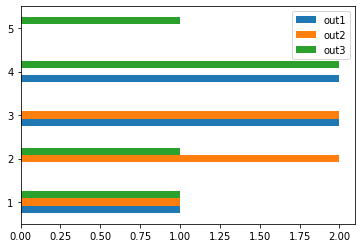

In [84]:
result.plot(kind='barh')